In [151]:
# Feature Subset Selection

# Adding new feature

import pandas as pd
#defining features
room_length = [18, 20, 10, 12, 18, 11]
room_breadth = [20, 20, 10, 11, 19, 10]
room_type = ['Big', 'Big', 'Normal', 'Normal', 'Big', 'Normal']
#creating a data frame
df=pd.DataFrame({'Length':room_length, 'Breadth':room_breadth, 'Type':room_type})

print(df)

   Length  Breadth    Type
0      18       20     Big
1      20       20     Big
2      10       10  Normal
3      12       11  Normal
4      18       19     Big
5      11       10  Normal


In [153]:
#Adding a feature called area from length and breadth

df['area']=df['Length']*df['Breadth']

print(df)

   Length  Breadth    Type  area
0      18       20     Big   360
1      20       20     Big   400
2      10       10  Normal   100
3      12       11  Normal   132
4      18       19     Big   342
5      11       10  Normal   110


In [155]:
##Encoding Nominal Variables
import pandas as pd
#Creating features
age = [18, 20, 23, 19, 18, 22]
city = ['City A', 'City B', 'City B', 'City A', 'City C', 'City B']
#Creating a data frame
df1 = pd.DataFrame({'age': age, 'city': city})

print(df1)

   age    city
0   18  City A
1   20  City B
2   23  City B
3   19  City A
4   18  City C
5   22  City B


In [157]:
# One-Hot Encoding :Converting String data to 0,1 [True/False] Format understable by ML models.

df=pd.get_dummies(data=df1)
print(df)

   age  city_City A  city_City B  city_City C
0   18         True        False        False
1   20        False         True        False
2   23        False         True        False
3   19         True        False        False
4   18        False        False         True
5   22        False         True        False


In [159]:
# When you set drop_first=True, one column is dropped to avoid
# multicollinearity (also called the dummy variable trap). This is common in regression models.

df=pd.get_dummies(data=df1,drop_first=True)
print(df)

   age  city_City B  city_City C
0   18        False        False
1   20         True        False
2   23         True        False
3   19        False        False
4   18        False         True
5   22         True        False


In [161]:
# Transforming numeric (continuous) features to categorical features


import pandas as pd
import numpy as np

apartment_area = [4720, 2430, 4368, 3969, 6142, 7912]
apartment_price = [2360000, 1215000, 2184000, 1984500, 3071000, 3956000]

df2 = pd.DataFrame({'Area': apartment_area, 'Price': apartment_price})

# Store original price in a new column to avoid losing numeric values
df2['Price_Category'] = np.where(df2['Price'] > 3000000, 'High',
    np.where(df2['Price'] > 2000000, 'Medium', 'Low')
)

# Final output
print(df2)

   Area    Price Price_Category
0  4720  2360000         Medium
1  2430  1215000            Low
2  4368  2184000         Medium
3  3969  1984500            Low
4  6142  3071000           High
5  7912  3956000           High


MODEL TRAINING

SIMPLE LINEAR REGRESSION

In [164]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df=pd.read_csv("Book1.csv")
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'package')

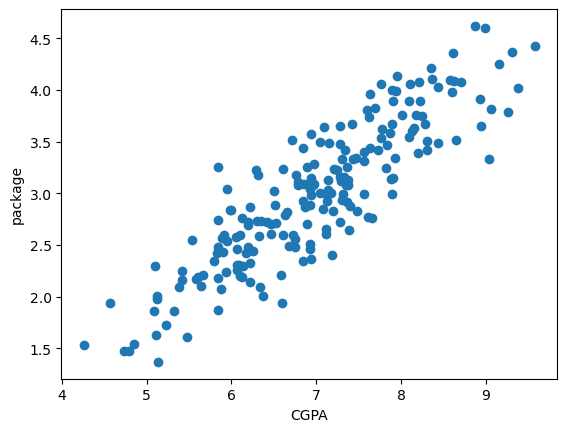

In [165]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel("CGPA")
plt.ylabel("package")

In [166]:
x=df.iloc[:,0:1]
y=df.iloc[:,-1]

print(x)
print(y)

     cgpa
0    6.89
1    5.12
2    7.82
3    7.42
4    6.94
..    ...
195  6.93
196  5.89
197  7.21
198  7.63
199  6.22

[200 rows x 1 columns]
0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64


In [170]:
from sklearn.model_selection import train_test_split 

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [172]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()  # Creates the model
lr.fit(x_train,y_train) # Train the model on training data

lr.predict(x_test.iloc[0].values.reshape(1,1))

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.78031348])

In [174]:
m=lr.coef_
m

array([0.57425647])

In [176]:
b=lr.intercept_
b

-1.0270069374542108

In [178]:
m*8.58+b

array([3.9001136])

In [180]:
y_pred=lr.predict(x_test)

In [182]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_pred))

0.08417638361329656


In [184]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [186]:
y_pred=lr.predict(x_test)
y_test.values

array([2.79, 3.23, 3.26, 3.04, 3.34, 4.21, 2.94, 2.87, 2.99, 3.58, 1.63,
       2.08, 4.08, 2.21, 3.47, 3.64, 2.74, 3.08, 2.17, 2.99, 2.31, 2.35,
       3.4 , 3.08, 3.81, 2.19, 1.53, 2.89, 3.16, 2.48, 3.51, 2.98, 3.39,
       3.28, 2.73, 3.74, 2.6 , 3.13, 3.82, 3.15])

In [25]:
# MAE

print("MAE",mean_absolute_error(y_test,y_pred))

MAE 0.23150985393278373


In [27]:
# MSE

print("Mse",mean_squared_error(y_test,y_pred))

Mse 0.08417638361329656


In [29]:
# RMSE

print("RMse",(mean_squared_error(y_test,y_pred))**0.5)

RMse 0.2901316659954521


In [31]:
# R2 Score -- best is nearby 1

print("R2_score",r2_score(y_test,y_pred))

R2_score 0.7730984312051673


MULTIPLE LINEAR REGRESSION

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

df=pd.read_csv('car data.csv')
print(df.head())

  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  


In [24]:
# Creating new column Car Age

df['Car_Age']=2023-df['Year']

In [25]:
x=df[['Car_Age','Present_Price','Kms_Driven','Fuel_Type']]
y=df[['Selling_Price']]

In [29]:
x=pd.get_dummies(x,drop_first=True)

In [31]:
# Split the data into training and testing sets

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=21)

In [33]:
# Create and train the multiple linear regression model

model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [35]:
# Make predictions on the test set

y_pred=model.predict(x_test)

In [45]:
coefficients=model.coef_
intercept=model.intercept_
mse=mean_squared_error(y_test,y_pred)

In [47]:
# Display the results

print("Coefficients:", coefficients)
print("Intercept:", intercept)
print("Mean Squared Error:", mse)

Coefficients: [[-3.14326929e-01  4.99683808e-01 -2.76193603e-05  2.38125578e+00
   9.04118435e-02]]
Intercept: [4.2184977]
Mean Squared Error: 5.303161190276245


In [49]:
# r2 score

r2=r2_score(y_test,y_pred)
print(r2)

0.7067480628742233


Polynomial Regression

In [85]:

df = pd.DataFrame({
    'sno':[1,2,3,4,5,6],
    'Temperature': [0, 20, 40, 60, 80, 100],
    'Pressure': [0.0002, 0.0012, 0.0060, 0.0300, 0.0900, 0.2700]
})

print(df)

   sno  Temperature  Pressure
0    1            0    0.0002
1    2           20    0.0012
2    3           40    0.0060
3    4           60    0.0300
4    5           80    0.0900
5    6          100    0.2700


In [87]:
x=df.iloc[:,1:2]
y=df.iloc[:,2]

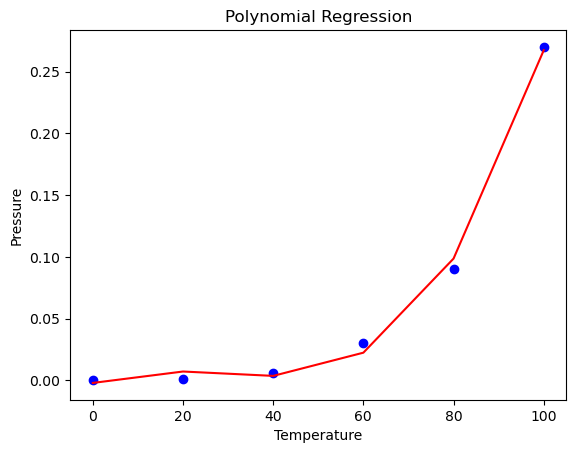

In [89]:
# Fitting Polynomial Regression to the dataset
# Fitting the Polynomial Regression model on two components X and y

import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 3)
model_Poly = poly.fit_transform(x)
lin_poly = LinearRegression()
lin_poly.fit(model_Poly, y)
# Visualising the Polynomial Regression results
plt.scatter(x, y, color = 'blue')
plt.plot(x, lin_poly.predict(model_Poly), color = 'red')
plt.title('Polynomial Regression')
plt.xlabel('Temperature')
plt.ylabel('Pressure')
plt.show()

In [91]:
lin=LinearRegression()
lin.fit(x,y)
x_t=np.array([70]).reshape(-1,1)
x_t.shape

(1, 1)

In [93]:
# Linear Regression Prediction

lin.predict(x_t)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.11307333])

In [95]:
# Polynomial Regression Prediction

pred2array = np.array([[70]]) #predict prssure for 70 degree temperature
lin_poly.predict(poly.fit_transform(pred2array))

array([0.05120625])

In [97]:
print("Linear Regression Prediction:", lin.predict(x_t))
print("Polynomial Regression Prediction:", lin_poly.predict(poly.fit_transform(pred2array)))

Linear Regression Prediction: [0.11307333]
Polynomial Regression Prediction: [0.05120625]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Knn

In [3]:
import pandas as pd

df=pd.read_csv('data_breast_cancer.csv')
print(df.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [17]:
x=df.iloc[:,2:32]

In [25]:
y=df.iloc[:,1]

In [27]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=44)


In [29]:
# kNN Classifier

from sklearn.neighbors import KNeighborsClassifier

kn=KNeighborsClassifier(n_neighbors=27)

In [33]:
# Train the classifier

model=kn.fit(x_train,y_train)
pred=model.predict(x_test)
pred

array(['M', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M',
       'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B',
       'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'M', 'M', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M', 'B',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'M'], dtype=object)

In [37]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,pred)
cm

array([[73,  2],
       [ 2, 37]])

In [39]:
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]
print(TP, FN, TN, FP)

37 2 73 2


In [43]:
accuracy = (TP + TN) / (TP+FP+FN+TN)
accuracy

0.9649122807017544

In [45]:
sensitivity = TP / (TP + FN)
sensitivity

0.9487179487179487

In [47]:
specificity = TN / (TN + FP)
specificity

0.9733333333333334

CarPrice_Assignment.csv

.

In [92]:
df=pd.read_csv('CarPrice_Assignment.csv')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


DATA PRE-PROCESSING

Making company name 

In [96]:
df['company-name']=df['CarName'].str.split(' ').str[0]

In [98]:
df['company-name'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [102]:
# Step 1: Create a dictionary of misspelled -> correct names
brand_corrections = {
    'maxda': 'mazda',
    'porcshce': 'porsche',
    'toyouta': 'toyota',
    'vokswagen': 'volkswagen',
    'vw': 'volkswagen',
    'Nissan': 'nissan'
}

df['company-name'] = df['CarName'].str.split(' ').str[0].str.lower()

df['company-name'] = df['company-name'].replace(brand_corrections)

In [104]:
df['company-name'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [110]:
x=df.iloc[:,1:27]

In [122]:
x.drop(columns=['price'])

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,company-name
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,alfa-romero
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,alfa-romero
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,alfa-romero
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,audi
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,volvo
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,volvo
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,volvo
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,volvo


In [124]:
y=df['price']

In [126]:
x=pd.get_dummies(data=x,drop_first=True)

In [218]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)

In [220]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [222]:
# Make predictions on the test set

y_pred=model.predict(x_test)

In [224]:
r2=r2_score(y_test,y_pred)
print(r2)

0.7576283066961194


QB SOLn

In [ ]:
# QB-170: You've been given a dataset with apartment area and price information. There's a noticeable non-linear relationship between
# area and price. To address this you intend to categorize them into 'High', 'Medium', and 'Low' groups. Prices above $3,000,000
# are 'High', below $2,000,000 are 'Low', and between $2,000,000 and $3,000,000 are 'Medium'. Write a code to achieve this
# assuming that dataset has two columns named area and price

import numpy as np

df['price']=np.where(df['price']>300000,'High',np.where(df['price']<200000,'Low','Medium'))

In [ ]:
# QB-171: In a survey dataset, you have a column representing participants' ages. You want to categorize ages into 'Young', 'Middle-aged',
# and 'Elderly' groups. Ages below 30 are 'Young', ages between 30 and 60 are 'Middle-aged', and ages above 60 are 'Elderly'.
# Write a code to achieve this assuming the dataset has a column named 'age'.

df['age']=np.where(df['age']<30,'Young',np.where(df['age']>60,'Elderly','Middle-Aged'))

In [1]:
# 195) For x = np.array([5, 15, 25, 35, 45, 55]) and y = np.array([5, 20, 14, 32, 22, 38]), apply simple linear regression using scikit learn
# library and calculate calculate R squared, coeficient and intercept. Predict the y values for x = np.arange(5). (Don't split data for
# training/testing)

import numpy as np
from sklearn.linear_model import LinearRegression

x = np.array([5, 15, 25, 35, 45, 55]).reshape(-1,1)
y = np.array([5, 20, 14, 32, 22, 38])

model=LinearRegression()
model.fit(x,y)

r_sq=model.score(x,y)
coef=model.coef_[0]
intercept=model.intercept_

x_predict=np.arange(5).reshape(-1,1)
y_predict=model.predict(x_predict)

print("R squared ",r_sq)
print("Co efficient ",coef)
print("Intercept ",intercept)
print("Predicted y values ",y_predict)

R squared  0.715875613747954
Co efficient  0.5399999999999999
Intercept  5.633333333333333
Predicted y values  [5.63333333 6.17333333 6.71333333 7.25333333 7.79333333]


In [3]:
# """Given a real estate price size year dataset, implement multiple
# linear regression using scikitlearn library. Using the model, make
# a prediction about an apartment price with size 750 sq.ft. for 2009.
# Also Calculate R squared, coeficient and intercept. (Don't split data for training/testing)"""

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

df=pd.read_csv('real_estate.csv')
print(df.head())

        price     size  year
0  234314.144   643.09  2015
1  228581.528   656.22  2009
2  281626.336   487.29  2018
3  401255.608  1504.75  2015
4  458674.256  1275.46  2009


In [15]:
x=df[['size','year']]
y=df['price']

model=LinearRegression()
model.fit(x,y)

r_sq=model.score(x,y)
coef=model.coef_[0]
intercept=model.intercept_

prediction=model.predict([[750, 2009]])

print("R squared ",r_sq)
print("Co efficient ",coef)
print("Intercept ",intercept)
print("Predicted values ",prediction)

R squared  0.7764803683276791
Co efficient  227.7008540074765
Intercept  -5772267.017463276
Predicted values  [258330.34465995]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [77]:
# #Q-198
# """Predict salary based on job position of 6.5 using polynomial
# regression with a degree of 3 and scikit learn library
# for the given 'Position_Salaries.csv' dataset.
# (Don't split data for training/testing)"""

import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

data = pd.read_csv('Position_Salaries.csv')
print(data)

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000


In [79]:
x = data[['Level']].values
y = data['Salary'].values

In [81]:
poly=PolynomialFeatures(degree=3)
x_poly=poly.fit_transform(x)

model=LinearRegression()
model.fit(x_poly,y)

LinearRegression()

In [83]:
# Predict Salary for level 6.5

pos_level=poly.transform([[6.5]])
prediction=model.predict(pos_level)

In [85]:
r_sq=model.score(x_poly,y)
coef=model.coef_[0]
inter=model.intercept_

In [87]:
print("R squared ",r_sq)
print("Co efficient ",coef)
print("Intercept ",inter)
print("Predicted values ",prediction)

R squared  0.9812097727913367
Co efficient  0.0
Intercept  -121333.33333338937
Predicted values  [133259.46969697]


In [89]:
# QB-200 """Write a program to make a model based on linear regression
# for the following dataframe created from a csv file named “Package.csv”
# of x and y which follows equation y = a + bx. Write a program which can predict value
# of y based on any value of x, also write code to find value of a and b in above equation.
#  Given Data in csv file


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df=pd.read_csv('Package.csv')
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [99]:
x=df.iloc[:,0:1]
y=df.iloc[:,:-1]

In [108]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [110]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [112]:
y_pred=model.predict(x_test)

In [116]:
a=model.intercept_
b=model.coef_[0]

In [118]:
print(f"Value of a (intercept): {a}")
print(f"Value of b (coefficient): {b}")

Value of a (intercept): [2.66453526e-15]
Value of b (coefficient): [1.]


In [120]:
print("Predicted values for the testing set:")
for i in range(len(y_test)):
    print(f"Actual: {y_test.iloc[i]}, Predicted: {y_pred[i]}")

from sklearn import metrics
print("MAE: ",metrics.mean_absolute_error(y_test,y_pred))
print("MsE: ",metrics.mean_squared_error(y_test,y_pred))

Predicted values for the testing set:
Actual: cgpa    6.63
Name: 95, dtype: float64, Predicted: [6.63]
Actual: cgpa    7.25
Name: 15, dtype: float64, Predicted: [7.25]
Actual: cgpa    7.36
Name: 30, dtype: float64, Predicted: [7.36]
Actual: cgpa    5.95
Name: 158, dtype: float64, Predicted: [5.95]
Actual: cgpa    7.93
Name: 128, dtype: float64, Predicted: [7.93]
Actual: cgpa    8.35
Name: 115, dtype: float64, Predicted: [8.35]
Actual: cgpa    7.3
Name: 69, dtype: float64, Predicted: [7.3]
Actual: cgpa    6.22
Name: 170, dtype: float64, Predicted: [6.22]
Actual: cgpa    7.32
Name: 174, dtype: float64, Predicted: [7.32]
Actual: cgpa    7.87
Name: 45, dtype: float64, Predicted: [7.87]
Actual: cgpa    5.11
Name: 66, dtype: float64, Predicted: [5.11]
Actual: cgpa    5.88
Name: 182, dtype: float64, Predicted: [5.88]
Actual: cgpa    8.21
Name: 165, dtype: float64, Predicted: [8.21]
Actual: cgpa    6.59
Name: 78, dtype: float64, Predicted: [6.59]
Actual: cgpa    7.84
Name: 186, dtype: float64,